In [3]:
import pandas as pd

df = pd.read_csv("data/data_peliculas_transformado_filtrado.csv")
df.head()

,Título,URL,Procesado,Nota,Votos,Año,Reparto,Director,Compañías,Coproducción,Géneros,Premios,Presupuesto,Ingresos
0,El verdugo,https://www.filmaffinity.com/es/film411856.html,Sí,8.2,41447.0,1963-01-01,"['José Isbert', 'Nino Manfredi', 'Emma Penella...",['Luis García Berlanga'],"['Naga Films', 'Zabra Films']","['España-Italia', 'Naga']","['Comedia', 'Sátira', 'Comedia negra', 'Pelícu...",['1963: Festival de Venecia: Premios FIPRESCI'],0.0,0.0
1,Los santos inocentes,https://www.filmaffinity.com/es/film879812.html,Sí,8.1,44470.0,1984-01-01,"['Alfredo Landa', 'Francisco Rabal', 'Juan Die...",['Mario Camus'],"['Ganesh', 'RTVE']",['No se encontró información de coproducción'],"['Drama', 'Drama social', 'Vida rural', 'Años ...",['1984: Cannes: Mejor Actor (ex aequo: Francis...,0.0,3149062.0
2,Plácido,https://www.filmaffinity.com/es/film895672.html,Sí,8.1,20396.0,1961-01-01,"['Cassen', 'José Luis López Vázquez', 'Elvira ...",['Luis García Berlanga'],"['Jet Films', 'Alfredo Matas']",['Films.Productor:Alfredo'],"['Comedia', 'Pobreza', 'Navidad', 'Sátira']",['1961: Nominada al Oscar: Mejor película de h...,0.0,0.0
3,Viridiana,https://www.filmaffinity.com/es/film123112.html,Sí,8.1,28771.0,1961-01-01,"['Silvia Pinal', 'Fernando Rey', 'Francisco Ra...",['Luis Buñuel'],"['Films 59', 'Uninci']","['España-México', 'Films']","['Drama', 'Religión', 'Película de culto']",['1961: Festival de Cannes: Palma de Oro (ex-a...,0.0,679244.0
4,"Bienvenido, Míster Marshall",https://www.filmaffinity.com/es/film435869.html,Sí,8.0,31421.0,1953-01-01,"['José Isbert', 'Lolita Sevilla', 'Manolo Morá...",['Luis García Berlanga'],['Uninci'],['No se encontró información de coproducción'],"['Comedia', 'Sátira']",['1953: Festival de Cannes: Premio Internacion...,0.0,0.0


In [12]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
ruta_archivo = 'data/data_peliculas_transformado.csv'
datos = pd.read_csv("Data/data_peliculas_transformado.csv")

# Convertir 'Año' a formato de fecha y extraer el año
datos['Año'] = pd.to_datetime(datos['Año'], errors='coerce')
datos['Año'] = datos['Año'].dt.year

# Convertir 'Géneros' a una lista de cadenas
datos['Géneros'] = datos['Géneros'].apply(lambda x: eval(x))

# Definir los períodos
periodos = [(1900, 1936), (1937, 1960), (1961, 1975), (1976, 1982), (1983, 2007), (2008,2023), (1900, 2023)]

# Inicializar un diccionario para almacenar los géneros para cada período
conteo_generos = {}

# Bucle para contar los géneros en cada período
for inicio, fin in periodos:
    # Filtrar los datos para el período actual
    mascara = (datos['Año'] >= inicio) & (datos['Año'] <= fin)
    datos_filtrados = datos[mascara]
    
    # Aplanar la lista de géneros para todas las películas en el período
    todos_los_generos = [genero for sublist in datos_filtrados['Géneros'] for genero in sublist]
    
    # Contar la frecuencia de cada género, excluyendo 'Drama' y 'Comedia'
    conteo_genero = pd.Series(todos_los_generos).value_counts()
    conteo_genero = conteo_genero.drop(labels=['Drama', 'Comedia'], errors='ignore')
    
    # Almacenar los resultados en el diccionario
    conteo_generos[(inicio, fin)] = conteo_genero

# Bucle para identificar los géneros más destacados en cada período
for periodo, conteo_genero in conteo_generos.items():
    # Obtener los géneros más frecuentes
    generos_destacados = conteo_genero.head(10).index.tolist()
    
    # Convertir la lista de géneros a una cadena para mostrar
    generos_str = ', '.join(generos_destacados)
    
    # Mostrar el resultado
    print(f'De {periodo[0]} a {periodo[1]}, los géneros más destacados son {generos_str}.')


De 1900 a 1936, los géneros más destacados son Musical, Cine mudo, Cine dentro del cine, Cine negro, Flamenco, Circo, Guerra Civil Española, Romance, Amistad.
De 1937 a 1960, los géneros más destacados son Musical, Siglo XIX, Cine negro, Intriga, Crimen, Romance, Vida rural, Thriller, Bélico, Melodrama.
De 1961 a 1975, los géneros más destacados son Musical, Terror, Romance, Crimen, Intriga, Thriller, Western, Spaghetti Western, Cine negro, Vida rural.
De 1976 a 1982, los géneros más destacados son Terror, Cine quinqui, Erótico, Musical, Basado en hechos reales, Crimen, Política, Intriga, Familia, Infantil.
De 1983 a 2007, los géneros más destacados son Thriller, Romance, Intriga, Terror, Crimen, Familia, Fantástico, Comedia negra, Homosexualidad, Adolescencia.
De 2008 a 2023, los géneros más destacados son Thriller, Romance, Terror, Intriga, Familia, Fantástico, Comedia dramática, Adolescencia, Comedia romántica, Basado en hechos reales.
De 1900 a 2023, los géneros más destacados son 

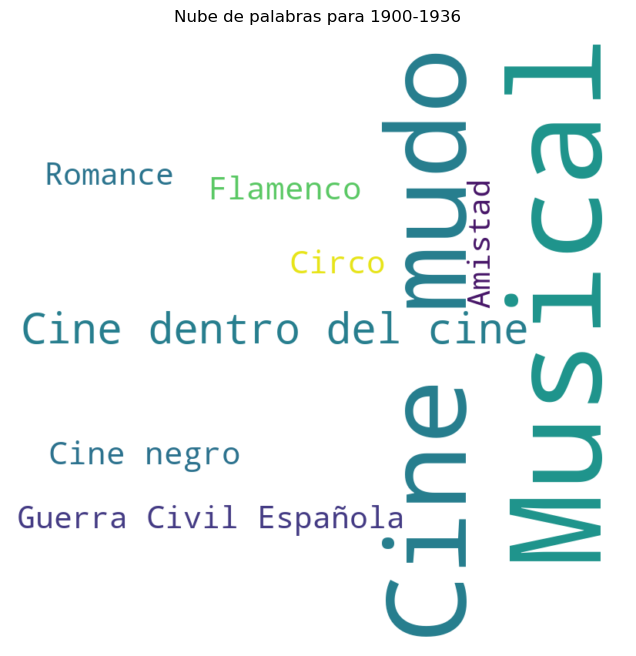

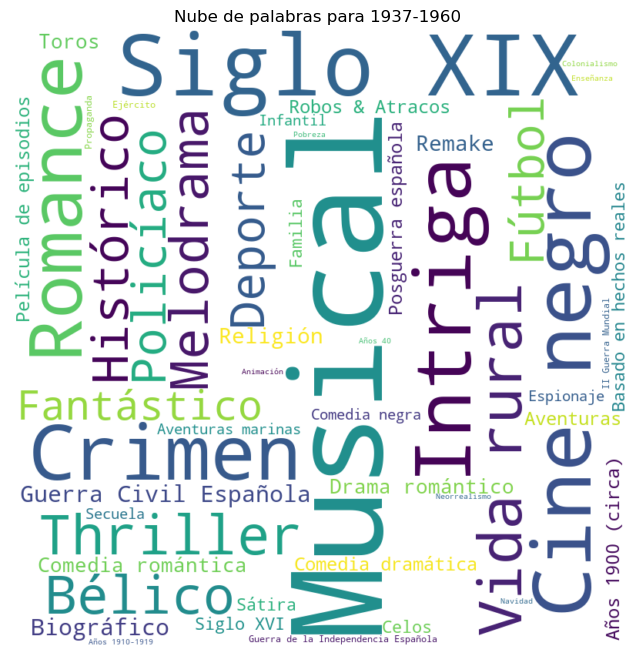

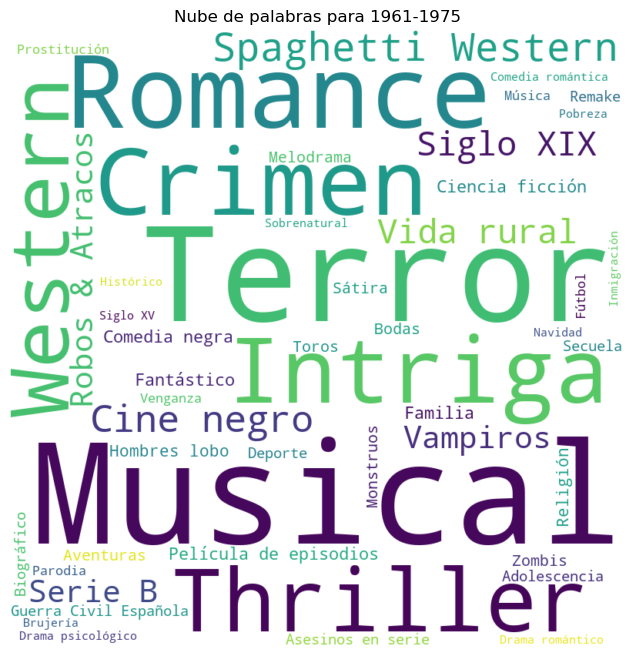

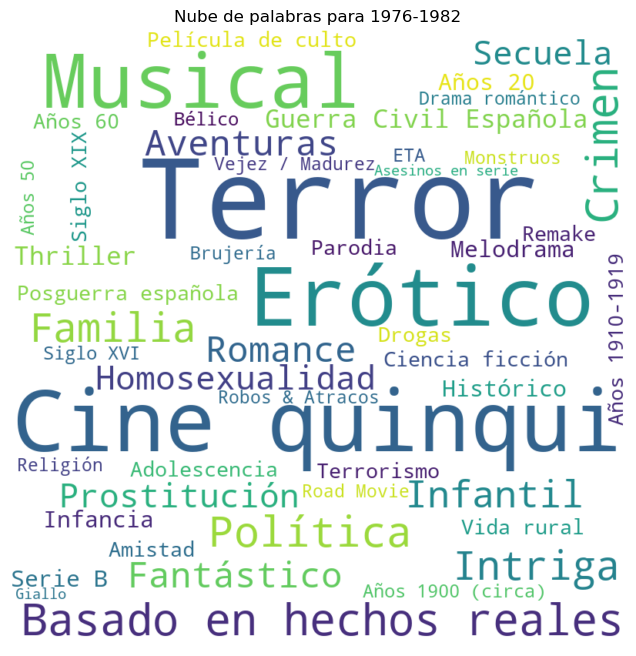

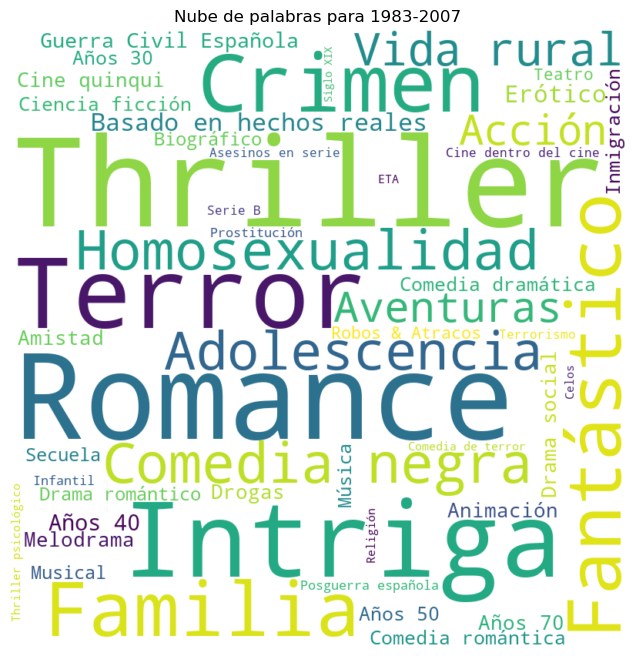

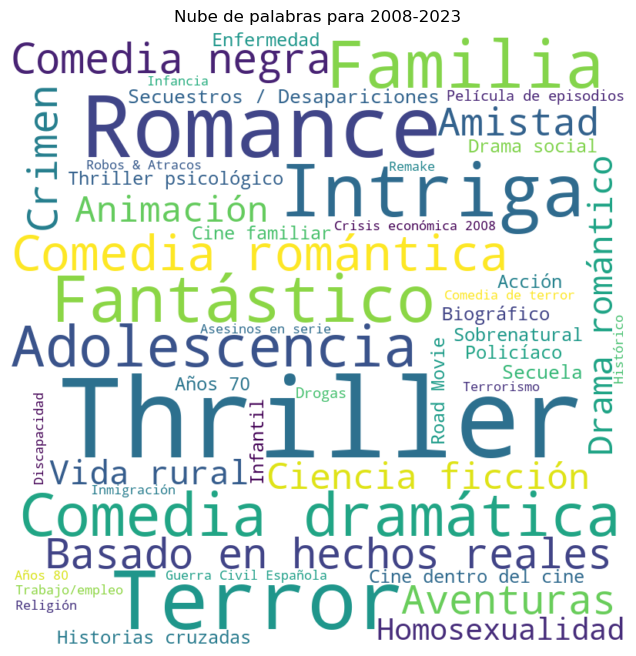

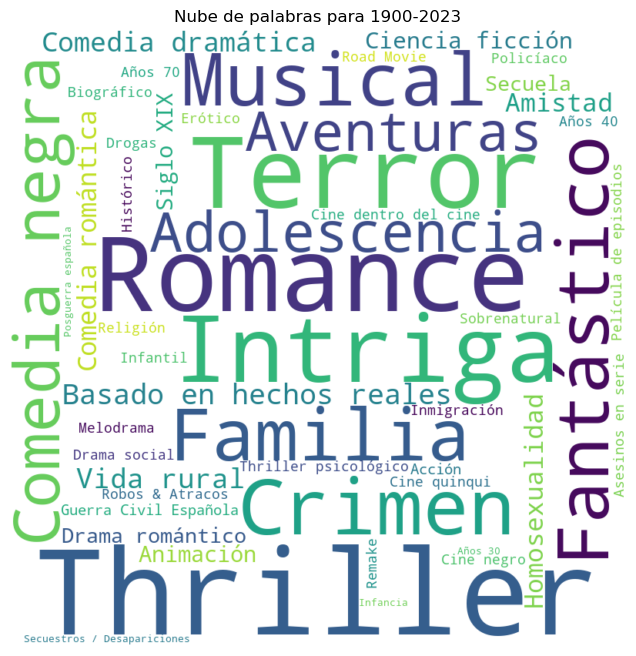

De 1900 a 1936, los géneros más destacados son Musical, Cine mudo, Cine dentro del cine.
De 1937 a 1960, los géneros más destacados son Musical, Siglo XIX, Cine negro.
De 1961 a 1975, los géneros más destacados son Musical, Terror, Romance.
De 1976 a 1982, los géneros más destacados son Terror, Cine quinqui, Erótico.
De 1983 a 2007, los géneros más destacados son Thriller, Romance, Intriga.
De 2008 a 2023, los géneros más destacados son Thriller, Romance, Terror.
De 1900 a 2023, los géneros más destacados son Thriller, Romance, Terror.


In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Etiquetas editables
titulo_nube_palabras = 'Nube de palabras para {}-{}'
generos_destacados_label = 'De {} a {}, los géneros más destacados son {}.'

# Cargar el archivo CSV en un DataFrame
ruta_archivo = 'data_peliculas_transformado.csv'
datos = pd.read_csv("Data/data_peliculas_transformado.csv")

# Convertir 'Año' a formato de fecha y extraer el año
datos['Año'] = pd.to_datetime(datos['Año'], errors='coerce')
datos['Año'] = datos['Año'].dt.year

# Convertir 'Géneros' a una lista de cadenas
datos['Géneros'] = datos['Géneros'].apply(lambda x: eval(x))

# Inicializar un diccionario para almacenar los géneros para cada período
conteo_generos = {}

# Bucle para contar los géneros en cada período
for inicio, fin in periodos:
    # Filtrar los datos para el período actual
    mascara = (datos['Año'] >= inicio) & (datos['Año'] <= fin)
    datos_filtrados = datos[mascara]
    
    # Aplanar la lista de géneros para todas las películas en el período
    todos_los_generos = [genero for sublist in datos_filtrados['Géneros'] for genero in sublist]
    
    # Contar la frecuencia de cada género, excluyendo 'Drama' y 'Comedia'
    conteo_genero = pd.Series(todos_los_generos).value_counts()
    conteo_genero = conteo_genero.drop(labels=['Drama', 'Comedia'], errors='ignore')
    
    # Almacenar los resultados en el diccionario
    conteo_generos[(inicio, fin)] = conteo_genero

# Función para crear y mostrar una nube de palabras para un período dado
def mostrar_nube_palabras(periodo, conteo_genero):
    # Crear una nube de palabras
    nube_palabras = WordCloud(width=800, height=800, background_color='white', max_words=50).generate_from_frequencies(conteo_genero)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(8, 8))
    plt.imshow(nube_palabras, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo_nube_palabras.format(periodo[0], periodo[1]))
    plt.show()

# Bucle para crear una nube de palabras para cada período
for periodo, conteo_genero in conteo_generos.items():
    mostrar_nube_palabras(periodo, conteo_genero)

# Bucle para identificar los géneros más destacados en cada período
for periodo, conteo_genero in conteo_generos.items():
    # Obtener los géneros más frecuentes
    generos_destacados = conteo_genero.head(3).index.tolist()
    
    # Convertir la lista de géneros a una cadena para mostrar
    generos_str = ', '.join(generos_destacados)
    
    # Mostrar el resultado
    print(generos_destacados_label.format(periodo[0], periodo[1], generos_str))


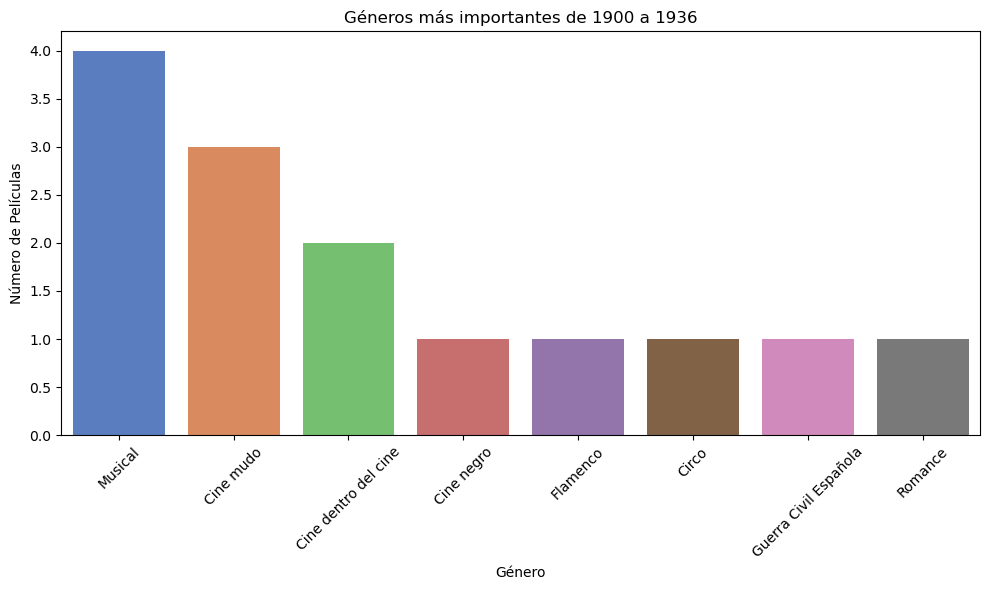

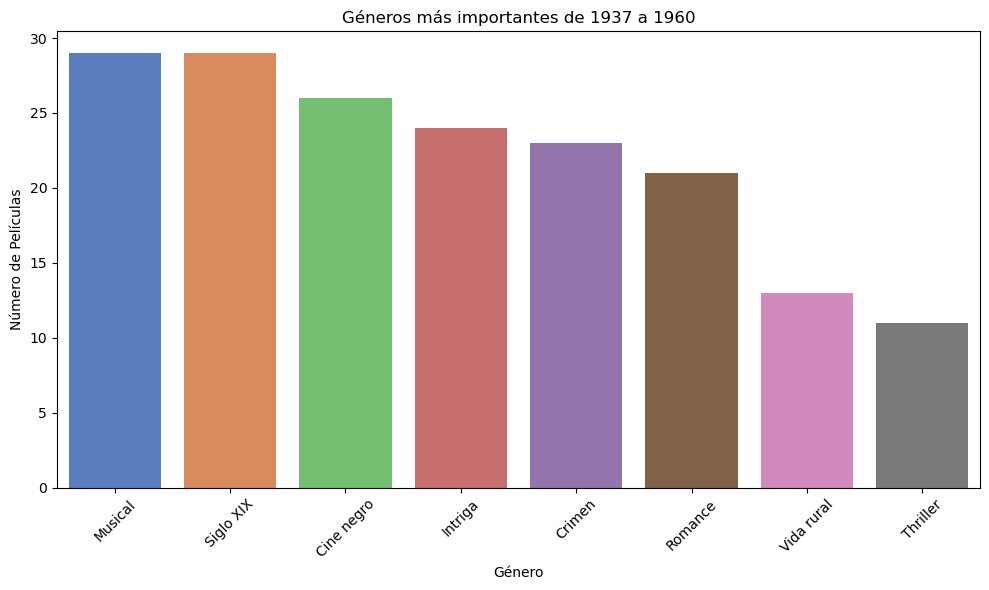

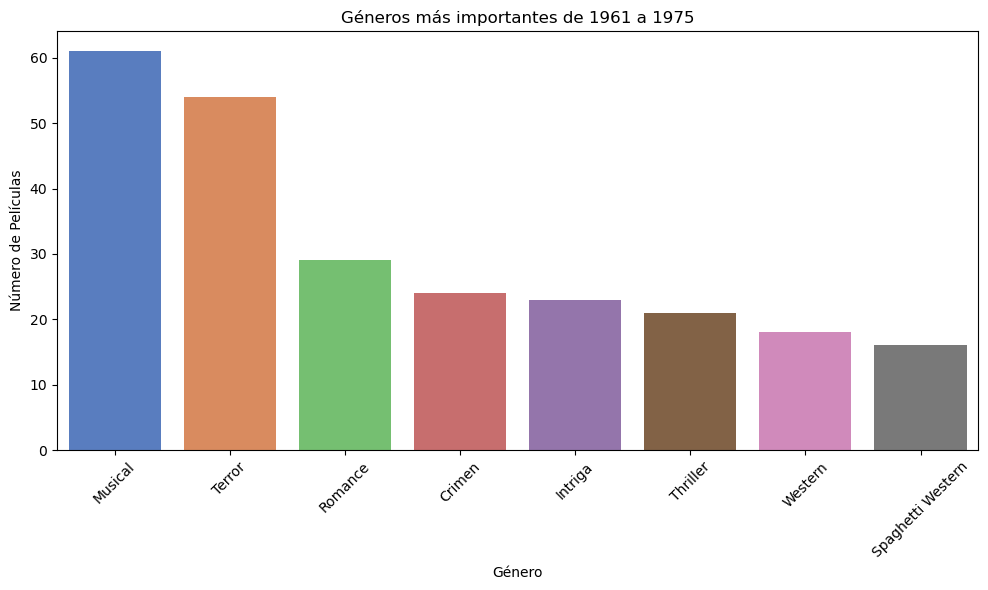

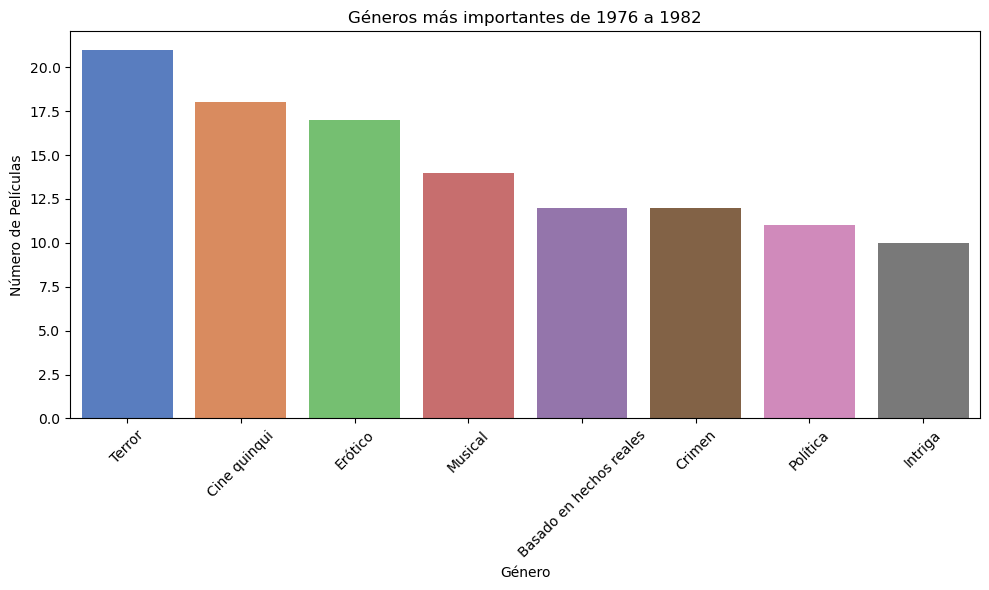

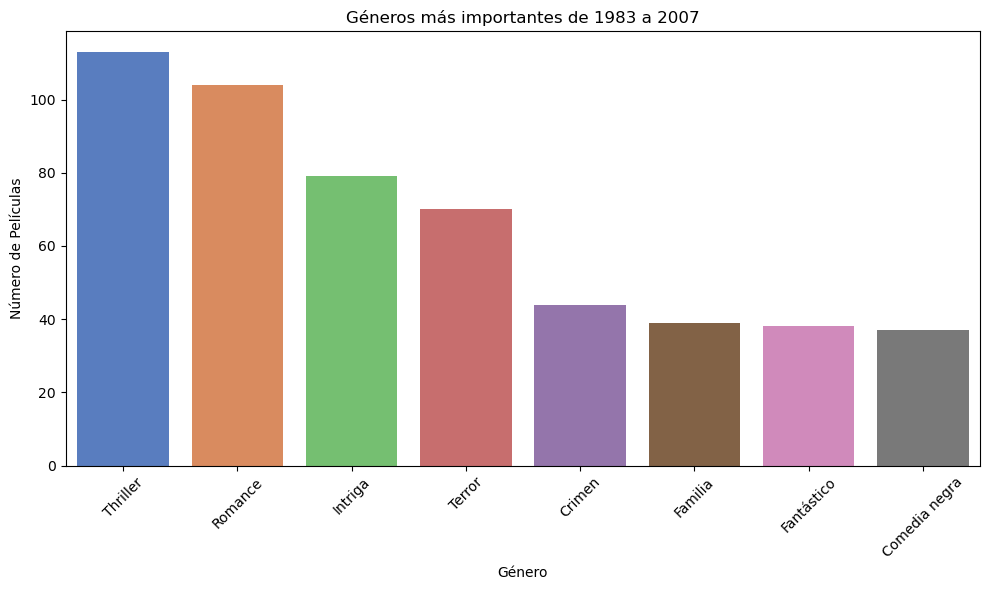

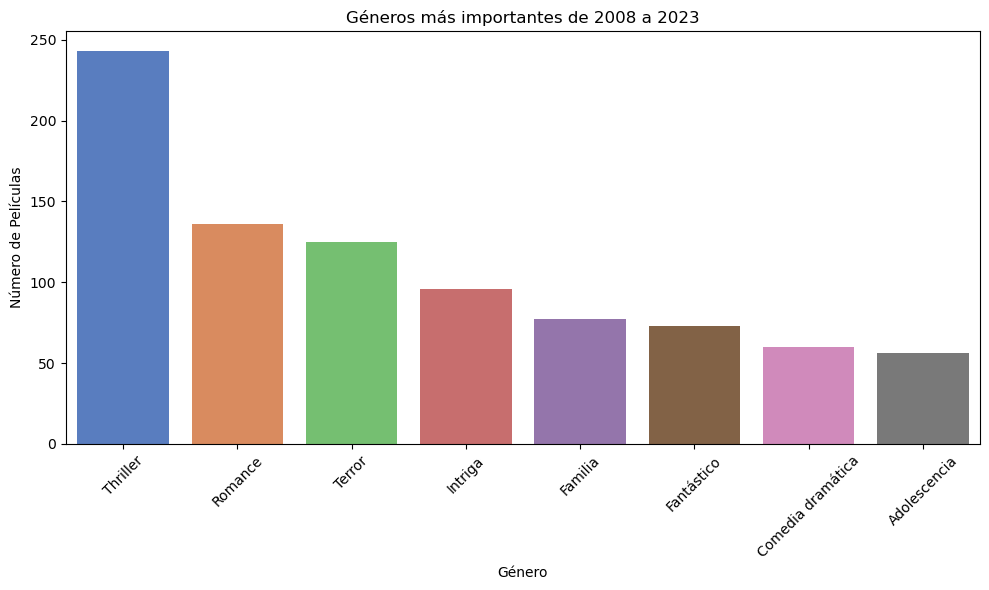

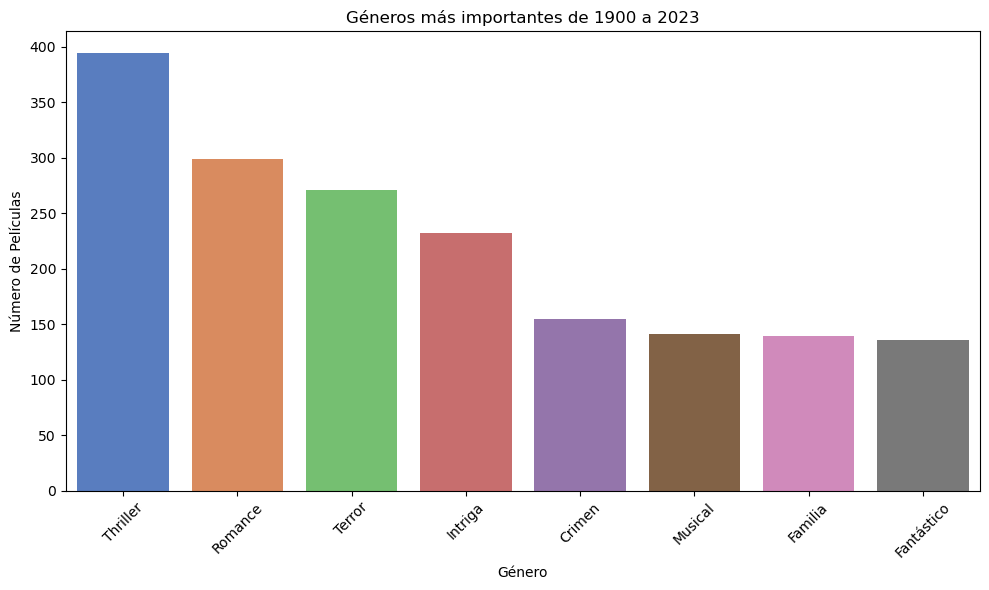

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Bucle para crear un gráfico de barras para los ocho géneros más importantes de cada período
for periodo, conteo_genero in conteo_generos.items():
    # Obtener los ocho géneros más frecuentes
    generos_destacados = conteo_genero.head(8)
    
    # Crear un DataFrame para los géneros más destacados
    generos_destacados_df = pd.DataFrame({'Género': generos_destacados.index, 'Número de Películas': generos_destacados.values})
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Género', y='Número de Películas', data=generos_destacados_df, palette="muted")
    plt.title(f'Géneros más importantes de {periodo[0]} a {periodo[1]}')
    plt.xticks(rotation=45)
    plt.xlabel('Género')
    plt.ylabel('Número de Películas')
    plt.tight_layout()
    plt.show()

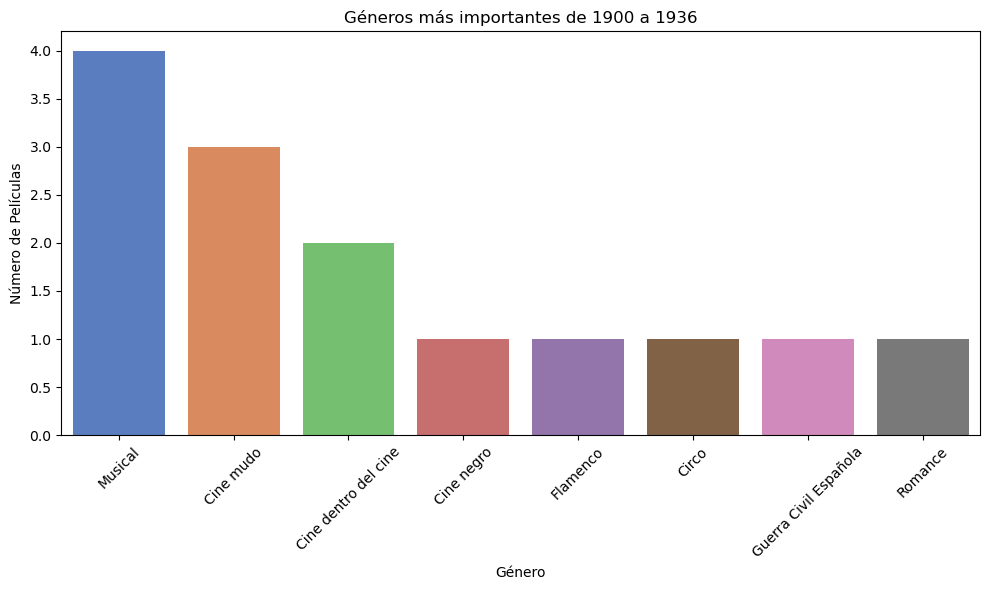

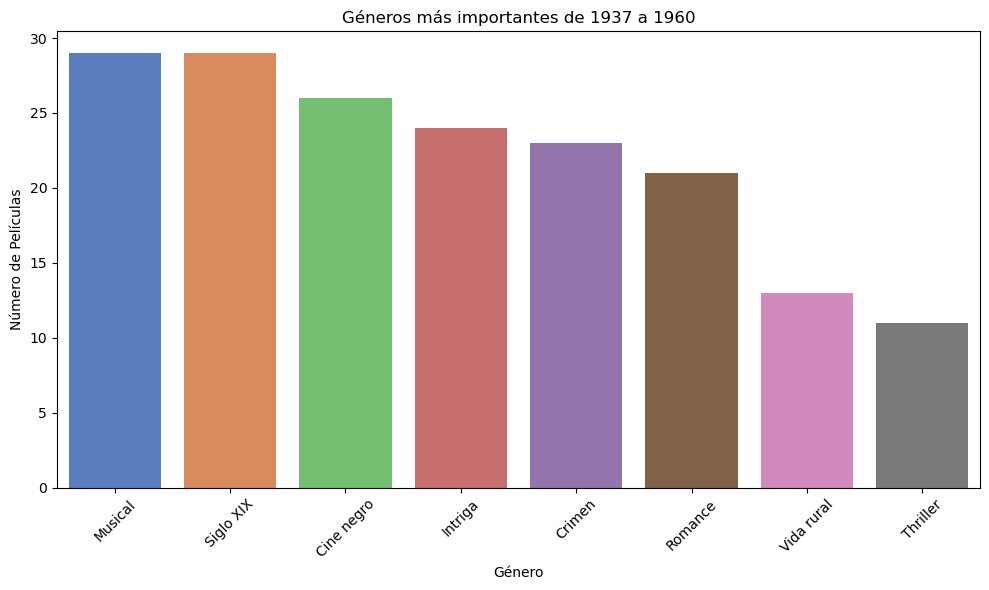

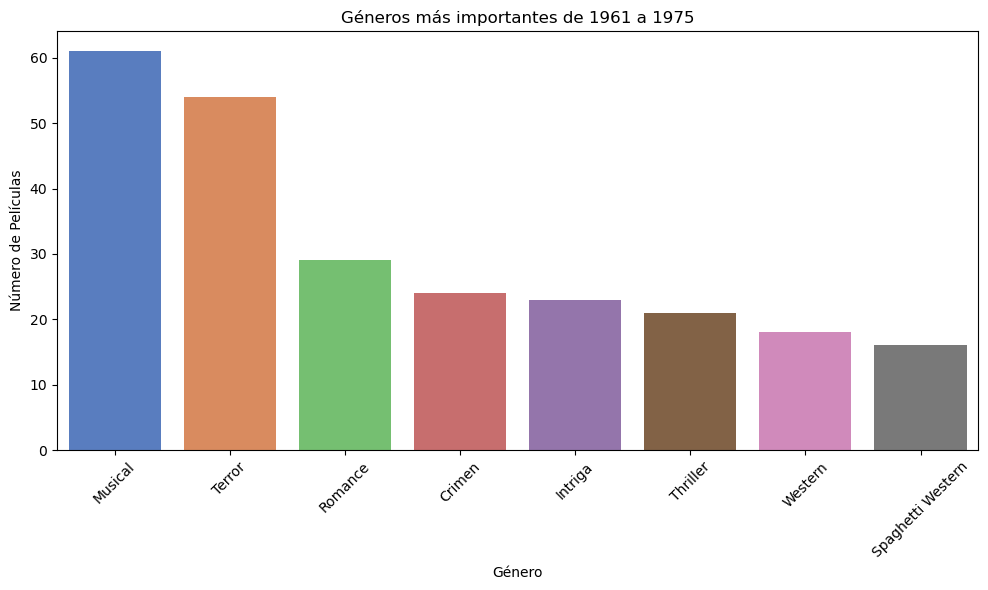

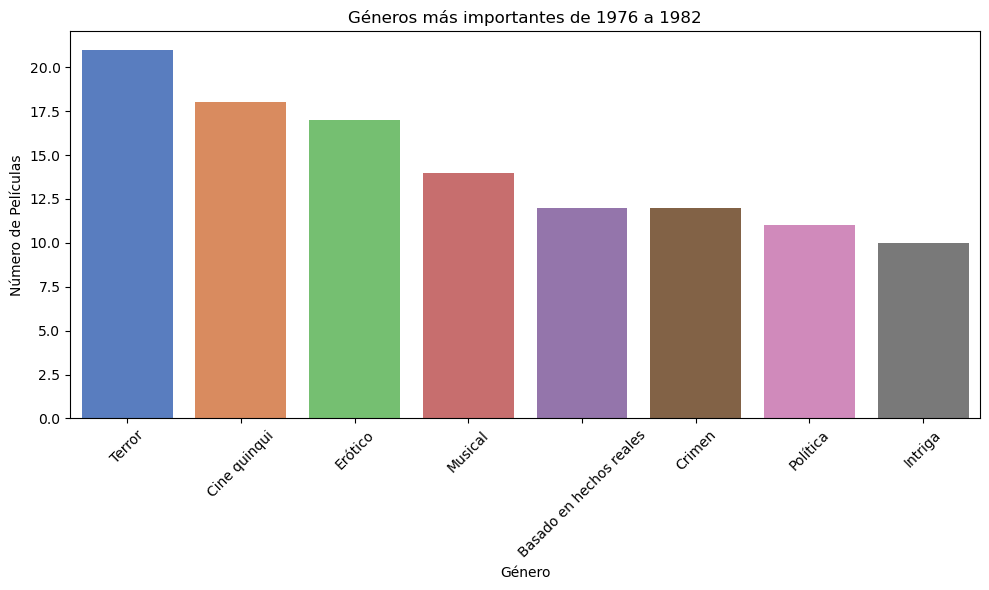

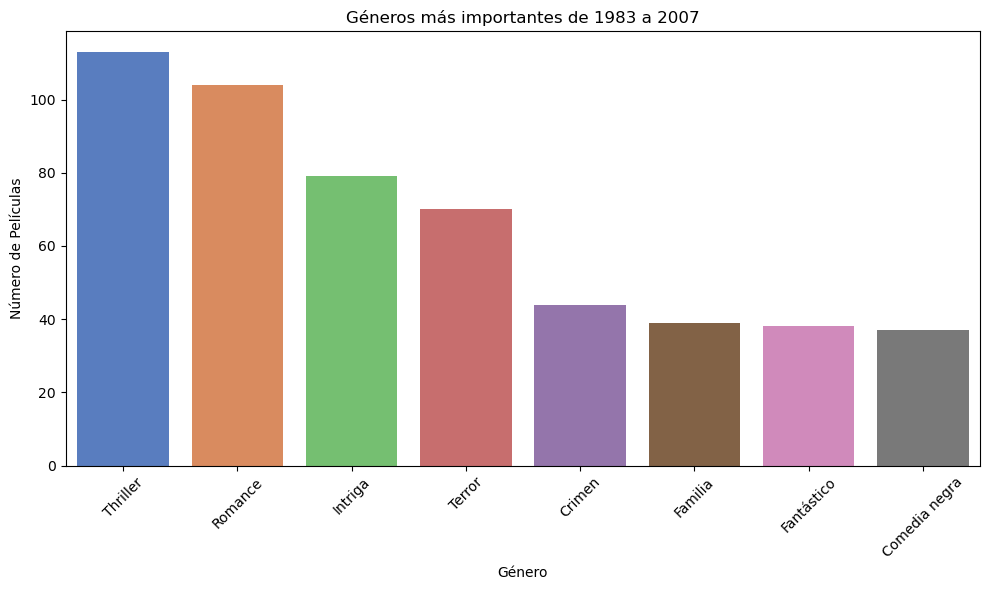

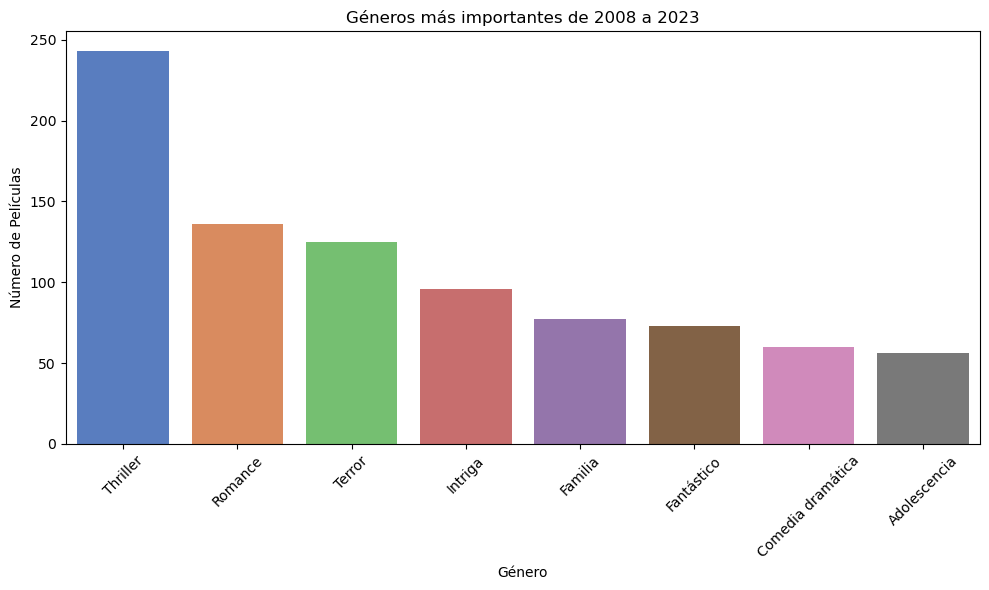

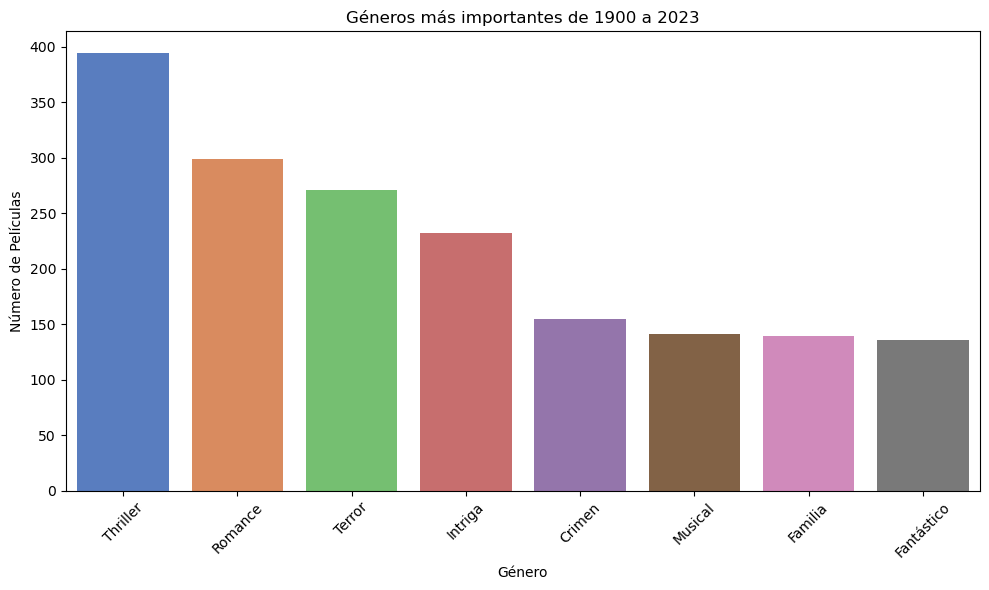